In [59]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

In [60]:
# https://www.kaggle.com/c/digit-recognizer

df = pd.read_csv('data/train.csv')
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [61]:
train_data = df.values
np.random.shuffle(train_data)
X = train_data[:, 1:].reshape(-1, 28, 28) / 255.0
Y = train_data[:, 0]


# X = df.iloc[:, 1:].values.reshape(-1, 28, 28) / 255.0
# Y = df.iloc[:, 0].values

In [62]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import LSTM, Input, Dense, GlobalMaxPooling1D, Bidirectional, Lambda, Concatenate
import tensorflow.keras.backend as k
# try:
#     if len(tensorflow.keras.tensorflow_backend._get_available_gpus()) > 0:
#         from tensorflow.keras.layers import CuDNNLSTM as LSTM
# except:
#     pass

In [63]:
input_layer = Input(shape = (28, 28))
rnn_layer_1 = Bidirectional(LSTM(15, return_sequences = True))(input_layer)
pool_layer_1 = GlobalMaxPooling1D()(rnn_layer_1)

permuter = Lambda(lambda x: k.permute_dimensions(x, pattern = (0, 2, 1)))

permute_layer = permuter(input_layer)
rnn_layer_2 = Bidirectional(LSTM(15, return_sequences = True))(permute_layer)
pool_layer_2 = GlobalMaxPooling1D()(rnn_layer_2)

concatenater = Concatenate(axis = 1)
concate_layer = concatenater([pool_layer_1, pool_layer_2])

output_layer = Dense(10, activation = 'softmax')(concate_layer)

model = Model(input_layer, output_layer)
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_7 (InputLayer)        [(None, 28, 28)]             0         []                            
                                                                                                  
 lambda_6 (Lambda)           (None, 28, 28)               0         ['input_7[0][0]']             
                                                                                                  
 bidirectional_8 (Bidirecti  (None, 28, 30)               5280      ['input_7[0][0]']             
 onal)                                                                                            
                                                                                                  
 bidirectional_9 (Bidirecti  (None, 28, 30)               5280      ['lambda_6[0][0]']      

In [64]:
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [65]:
r = model.fit(X, Y, batch_size = 32, epochs = 10, validation_split = 0.25)

Epoch 1/10
985/985 [==============================] - 14s 9ms/step - loss: 0.7837 - accuracy: 0.8053 - val_loss: 0.3195 - val_accuracy: 0.9156
Epoch 2/10
985/985 [==============================] - 8s 9ms/step - loss: 0.2559 - accuracy: 0.9308 - val_loss: 0.2134 - val_accuracy: 0.9422
Epoch 3/10
985/985 [==============================] - 9s 9ms/step - loss: 0.1804 - accuracy: 0.9494 - val_loss: 0.1746 - val_accuracy: 0.9496
Epoch 4/10
985/985 [==============================] - 10s 10ms/step - loss: 0.1439 - accuracy: 0.9587 - val_loss: 0.1424 - val_accuracy: 0.9579
Epoch 5/10
985/985 [==============================] - 9s 9ms/step - loss: 0.1257 - accuracy: 0.9636 - val_loss: 0.1343 - val_accuracy: 0.9604
Epoch 6/10
985/985 [==============================] - 8s 8ms/step - loss: 0.1069 - accuracy: 0.9677 - val_loss: 0.1177 - val_accuracy: 0.9655
Epoch 7/10
985/985 [==============================] - 9s 9ms/step - loss: 0.0949 - accuracy: 0.9711 - val_loss: 0.1093 - val_accuracy: 0.9676
Epo

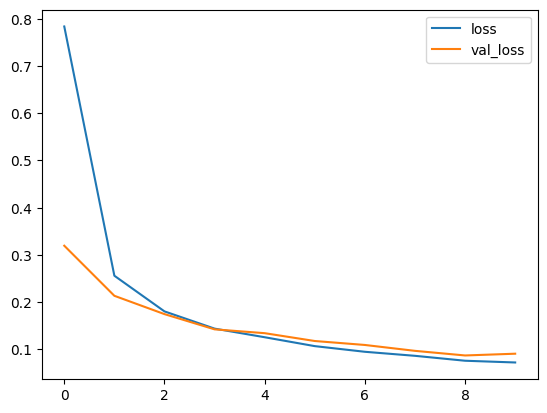

In [66]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

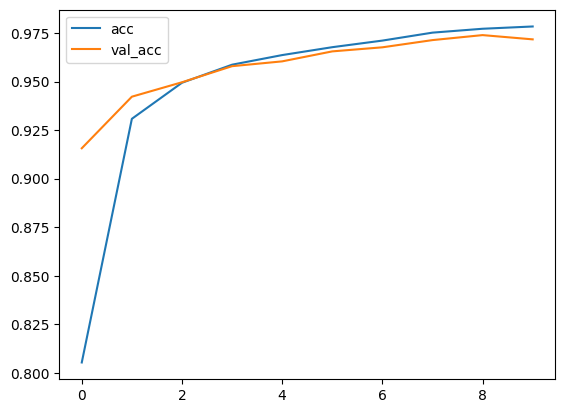

In [67]:
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()